In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [227]:
def parseData(data):
  # parse time as datetime
  data["time"] = pd.to_datetime(data["time"])
  data.set_index("time", inplace=True)

  # rename columns
  data.rename(columns={
    "temperature_2m_max (°C)": "mplt_temp",
    "temperature_2m_min (°C)": "min_temp",
    "temperature_2m_mean (°C)": "mean_temp",
    "precipitation_sum (mm)": "precipitation",
    "rain_sum (mm)": "rain",
    "snowfall_sum (cm)": "snowfall",
    "shortwave_radiation_sum (MJ/m²)": "radiation",
    "et0_fao_evapotranspiration (mm)": "evapotranspiration"
  }, inplace=True)

  # fix null values
  data["precipitation"] = data["precipitation"].replace(np.nan, 0)

  return data

In [228]:
def parseYears(data, years):

  data = parseData(data)

  # resample decade mean precipitation
  data["decade"] = data.index.year // years * years

  # group by decade and month
  decade_precipitations = data.groupby("decade")["precipitation"].mean().reset_index()

  return decade_precipitations  

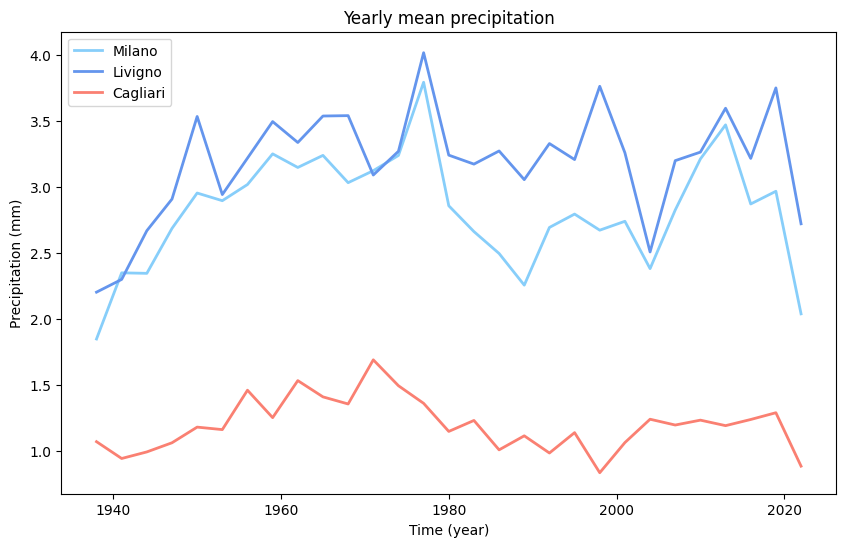

In [229]:
milano = parseYears(pd.read_csv("data/historical-weather-1940-2022/milano.csv"), 3)
livigno = parseYears(pd.read_csv("data/historical-weather-1940-2022/livigno.csv"), 3)
cagliari = parseYears(pd.read_csv("data/historical-weather-1940-2022/cagliari.csv"), 3)

plt.figure(figsize=(10, 6))

plt.plot(milano["decade"], milano["precipitation"], color='lightskyblue', linewidth=2, label="Milano")
plt.plot(livigno["decade"], livigno["precipitation"], color='cornflowerblue', linewidth=2, label="Livigno")
plt.plot(cagliari["decade"], cagliari["precipitation"], color='salmon', linewidth=2, label="Cagliari")

plt.title("Yearly mean precipitation")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Time (year)")
plt.legend()
plt.show()